In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
!nltk.download('punkt')
!nltk.download('stopwords')
import gensim
import tensorflow as tf
from tensorflow import keras

#from tensorflow import Tokenizer,pad_sequences
#from tensorflow  import np_utils
#from tensorflow.python.keras import keras# layers

#from tensorflow.python.keras.models import Sequential


# from keras.utils import np_utils
#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
import tqdm

import tensorflow as tf
#from keras import layers
#from keras.models import Sequential

'nltk.download' is not recognized as an internal or external command,
operable program or batch file.
'nltk.download' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
print(tf.__version__)

2.6.0


In [ ]:
if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
whole_clean_df= pd.read_csv("E:/QMSS/NLP/final/whole_clean_df.csv")

In [ ]:
whole_clean_df.head()

,Unnamed: 0,id,user_location,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,0,1340539111971516416,La Crescenta Montrose CA,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1338158543359250433,San Francisco CA,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1337855739918835717,Vancouver BC Canada,49165,3933,21853,True,2020-12-12 20:23:59,Facts are immutable Senator even when youre no...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1337851215875608579,Austria Ukraine and Kosovo,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1337841934170255365,Turkey Israel,1302,78,339,False,2020-12-12 19:29:07,while deaths are closing in on the mark milli...,"['PfizerBioNTech', 'Vaccine']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# whole_clean_df['lemma'] = whole_clean_df['lemma'].astype(str).apply(lambda x: x.encode('latin-1', 'ignore').decode('latin-1'))
# whole_clean_df['text_no_sw'] = whole_clean_df['text_no_sw'].astype(str).apply(lambda x: x.encode('latin-1', 'ignore').decode('latin-1'))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(whole_clean_df[['text_no_sw']],whole_clean_df['Emotion'],test_size=0.33,random_state=15)

In [ ]:
X_train = X_train['text_no_sw']

In [ ]:
X_test = X_test['text_no_sw']

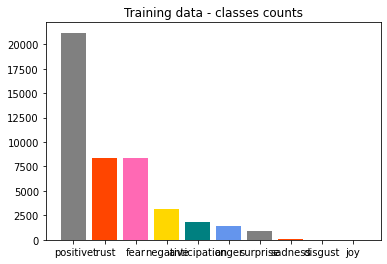

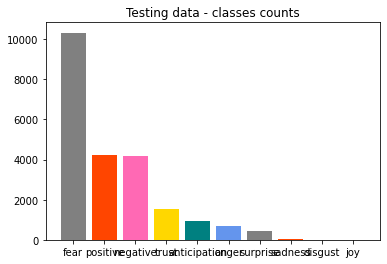

In [ ]:
import matplotlib.pyplot as plt

colors = np.array(["gray", 'orangered', 'hotpink', 'gold', 'teal', 'cornflowerblue'])
plt.bar(Y_train.unique(),height=Y_train.value_counts(), color=colors)
plt.title("Training data - classes counts")
plt.show()

plt.bar(Y_test.unique(),height=Y_test.value_counts(), color=colors)
plt.title("Testing data - classes counts")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
le = LabelEncoder()

Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))


Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)


In [ ]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
type(Y_train)

numpy.ndarray

In [ ]:
type(X_test)

pandas.core.series.Series

In [ ]:
le_name_mapping

{'anger': 0,
 'anticipation': 1,
 'disgust': 2,
 'fear': 3,
 'joy': 4,
 'negative': 5,
 'positive': 6,
 'sadness': 7,
 'surprise': 8,
 'trust': 9}

{'anger': 0,
 'anticipation': 1,
 'disgust': 2,
 'fear': 3,
 'joy': 4,
 'negative': 5,
 'positive': 6,
 'sadness': 7,
 'surprise': 8,
 'trust': 9}

In [ ]:
#!pip install numpy
from tensorflow.python.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))

In [ ]:
lens_train = [len(i) for i in X_train]
lens_test = [len(i) for i in X_test]
lens = lens_train + lens_test

maxlen = np.max(lens)

print('Max len:', maxlen)

Max len: 126


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
#sequences_val = tokenizer.texts_to_sequences(X_val)

X_train = pad_sequences(sequences_train, maxlen=126, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=126, truncating='pre')


vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 37864


In [ ]:
# X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
# X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

#Glove

In [ ]:
def get_embedding_vectors(tokenizer, dim=200):
    embedding_index = {}
    with open('E:/QMSS/NLP/final/glove.6B.200d.txt','r',encoding='UTF-8') as f:
        for line in tqdm.tqdm(f, "Reading GloVe"):
            values = line.split()
            word = ''.join(values[:-200])
            vectors = np.asarray(values[-200:], dtype='float32')
            embedding_index[word] = vectors

    word_index = tokenizer.word_index
    embedding_matrix = np.zeros((len(word_index)+1, dim))
    for word, i in word_index.items():
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            # words not found will be 0s
            embedding_matrix[i] = embedding_vector
          
    return embedding_matrix

In [ ]:
embedding_matrix = get_embedding_vectors(tokenizer)

Reading GloVe: 400000it [00:15, 25092.84it/s]


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional
from tensorflow.python.keras.engine.sequential import Sequential

# adam = Adam(learning_rate=0.005)

# model = Sequential()
# model.add(Embedding(vocabSize, 150, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
# model.add(Bidirectional(LSTM(256, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
# model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
# model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2)))
# model.add(Dense(10, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
# model.summary()

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
# callback = EarlyStopping(
#     monitor="val_loss",
#     patience=2,
#     restore_best_weights=True,)

In [ ]:
# with tf.device('/gpu:0'):
#     model.fit(X_train, Y_train,validation_data=(X_test, Y_test),
#               batch_size=256,
#               epochs=5,
#               verbose=1,
#               callbacks=[callback])

In [ ]:
# Fit model
# history = model.fit(X_train, Y_train,validation_data=(X_test, Y_test),verbose=1,batch_size=256, epochs=10,callbacks=[callback])

In [ ]:
EPOCHS= 30
act= "swish"
opt= tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
from tensorflow.python.keras import layers
embedding_dim = 200

model = Sequential()
model.add(layers.Embedding(input_dim=vocabSize, output_dim=embedding_dim, weights = [embedding_matrix], input_length=126))
model.add(layers.Dropout(0.3)) 
model.add(layers.Conv1D(filters=32, kernel_size=3, activation=act)) 
model.add(layers.MaxPool1D(pool_size=3)) 
model.add(layers.Dropout(0.3))
model.add(layers.Conv1D(filters=32, kernel_size=3, activation=act)) 
model.add(layers.MaxPool1D(pool_size=3)) 
model.add(layers.Dropout(0.3))
model.add(layers.Bidirectional(layers.LSTM(126, recurrent_dropout=0.3)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(126,activation=act)) 
model.add(layers.Dropout(0.3)) 
model.add(layers.Dense(10, activation="softmax"))
model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 126, 200)          7572800   
_________________________________________________________________
dropout (Dropout)            (None, 126, 200)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 124, 32)           19232     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 41, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 41, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 39, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 13, 32)            0

In [ ]:
checkpoint_filepath = 'E:/QMSS/NLP/final/Checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = model.fit(X_train, Y_train, epochs=EPOCHS, verbose=1, validation_data=(X_test, Y_test), batch_size=128, callbacks=[model_checkpoint_callback]) 
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/30
356/356 [==============================] - 50s 125ms/step - loss: 1.3013 - accuracy: 0.5458 - val_loss: 0.9605 - val_accuracy: 0.6737
Epoch 2/30
356/356 [==============================] - 44s 122ms/step - loss: 0.9144 - accuracy: 0.7012 - val_loss: 0.7671 - val_accuracy: 0.7474
Epoch 3/30
356/356 [==============================] - 44s 124ms/step - loss: 0.7440 - accuracy: 0.7615 - val_loss: 0.6607 - val_accuracy: 0.7922
Epoch 4/30
356/356 [==============================] - 46s 130ms/step - loss: 0.6316 - accuracy: 0.7984 - val_loss: 0.6121 - val_accuracy: 0.8100
Epoch 5/30
356/356 [==============================] - 48s 135ms/step - loss: 0.5436 - accuracy: 0.8277 - val_loss: 0.5579 - val_accuracy: 0.8258
Epoch 6/30
356/356 [==============================] - 46s 130ms/step - loss: 0.4873 - accuracy: 0.8456 - val_loss: 0.5399 - val_accuracy: 0.8350
Epoch 7/30
356/356 [==============================] - 46s 130ms/step - loss: 0.4391 - accuracy: 0.8631 - val_loss: 0.5322 - val_ac

In [ ]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

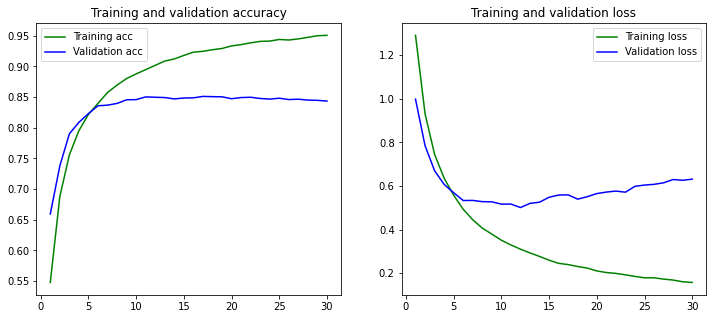

In [ ]:
PlotGraph(history)

In [ ]:
print(f"Best Accuracy Achieved by Model: {max(history.history['val_accuracy'])}")

Best Accuracy Achieved by Model: 0.8509336113929749


In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
model.save('E:/QMSS/NLP/final/my_model.h5') 

In [ ]:
y_pred=model.predict_classes(X_test)
print(y_pred)

E:\Anaconda\envs\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[3 6 3 ... 9 9 3]


In [ ]:
len(y_pred)

22386

In [ ]:
len(Y_test)

22386

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
type(Y_test)

numpy.ndarray

In [ ]:
import numpy as np

In [ ]:
de_Y_test= np.argmax(Y_test, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(de_Y_test,y_pred))

0.8509336192263022


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(de_Y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.74019   0.75787   0.74893       921
           1    0.77306   0.59348   0.67147       706
           2    0.00000   0.00000   0.00000        12
           3    0.83483   0.85005   0.84237      4168
           4    0.00000   0.00000   0.00000         1
           5    0.74098   0.67505   0.70648      1551
           6    0.89148   0.91565   0.90340     10326
           7    1.00000   0.04255   0.08163        47
           8    0.80268   0.53933   0.64516       445
           9    0.84044   0.86600   0.85303      4209

    accuracy                        0.85093     22386
   macro avg    0.66237   0.52400   0.54525     22386
weighted avg    0.84889   0.85093   0.84787     22386



E:\Anaconda\envs\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\envs\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\envs\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# from imblearn.over_sampling import SMOTE
# X_smote = X_train
# oversample = SMOTE(k_neighbors=2)

In [ ]:
# de_Y_train= np.argmax(Y_train, axis=1)

In [ ]:
# smote_y = LabelEncoder().fit_transform(de_Y_train)

In [ ]:
# type(X_smote)

numpy.ndarray

In [ ]:
# type(de_Y_train)

numpy.ndarray

In [ ]:
# X_smote, smote_y= oversample.fit_resample(X_smote, smote_y)

In [ ]:
# from collections import Counter
# counter = Counter(smote_y)
# from matplotlib import pyplot
# for k,v in counter.items():
# 	per = v / len(smote_y) * 100
# 	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# # plot the distribution
# pyplot.bar(counter.keys(), counter.values())
# pyplot.show()

In [ ]:
# checkpoint_filepath = 'E:/QMSS/NLP/final/Checkpoint_smote'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

In [ ]:
# smote_y =to_categorical(smote_y)

In [ ]:
# history2 = model.fit(X_smote, smote_y, epochs=EPOCHS, verbose=1, validation_data=(X_test, Y_test), batch_size=128, callbacks=[model_checkpoint_callback]) 
# loss, accuracy = model.evaluate(X_smote, smote_y, verbose=0)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
de_Y_weight= np.argmax(Y_train, axis=1)
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced',
                                                np.unique(de_Y_weight),
                                                de_Y_weight)

In [ ]:
checkpoint_filepath = 'E:/QMSS/NLP/final/Checkpoint_weight'

In [ ]:
class_weight = {0:2.4646420824,
                1:3.1983110486,
                2:239.2,
                3:0.5398907104,
                4:1514.9333333333,
                5:1.4215827338,
                6:0.2145392749,
                7:77.0305084746,
                8:5.0330011074,

                9:0.541047619

}

In [ ]:
class_weight

{0: 2.4646420824,
 1: 3.1983110486,
 2: 239.2,
 3: 0.5398907104,
 4: 1514.9333333333,
 5: 1.4215827338,
 6: 0.2145392749,
 7: 77.0305084746,
 8: 5.0330011074,
 9: 0.541047619}

In [ ]:
history3 = model.fit(X_train, Y_train, epochs=EPOCHS, verbose=1, validation_data=(X_test, Y_test), batch_size=128, callbacks=[model_checkpoint_callback],class_weight=class_weight) 
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/30
356/356 [==============================] - 49s 130ms/step - loss: 1.2361 - accuracy: 0.8677 - val_loss: 0.7780 - val_accuracy: 0.7892
Epoch 2/30
356/356 [==============================] - 46s 130ms/step - loss: 1.4618 - accuracy: 0.8345 - val_loss: 0.7528 - val_accuracy: 0.8005
Epoch 3/30
356/356 [==============================] - 47s 133ms/step - loss: 1.0136 - accuracy: 0.8656 - val_loss: 0.7528 - val_accuracy: 0.8048
Epoch 4/30
356/356 [==============================] - 46s 129ms/step - loss: 0.8434 - accuracy: 0.8789 - val_loss: 0.7387 - val_accuracy: 0.7968
Epoch 5/30
356/356 [==============================] - 48s 134ms/step - loss: 0.6291 - accuracy: 0.8704 - val_loss: 0.7813 - val_accuracy: 0.7833
Epoch 6/30
356/356 [==============================] - 49s 138ms/step - loss: 1.0076 - accuracy: 0.8678 - val_loss: 0.7545 - val_accuracy: 0.7955
Epoch 7/30
356/356 [==============================] - 49s 137ms/step - loss: 0.8232 - accuracy: 0.8637 - val_loss: 0.7677 - val_ac

In [ ]:
adam = Adam(learning_rate=0.005)

model = Sequential()
model.add(Embedding(vocabSize, 200, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(64, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(64, dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 126, 200)          7572800   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 126, 256)          336896    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 126, 128)          164352    
_________________________________________________________________
bidirectional_9 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 8,174,154
Trainable params: 601,354
Non-trainable params: 7,572,800
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional
callback = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True,
)

In [ ]:
history = model.fit(X_train,
                    Y_train,
                    validation_data=(X_test, Y_test),
                    verbose=1,
                    batch_size=126,
                    epochs=10,
                    callbacks=[callback]
                   )

Epoch 1/10
361/361 [==============================] - 992s 3s/step - loss: 0.9260 - accuracy: 0.6753 - val_loss: 0.7294 - val_accuracy: 0.7572
Epoch 2/10
361/361 [==============================] - 1048s 3s/step - loss: 0.6221 - accuracy: 0.7933 - val_loss: 0.5353 - val_accuracy: 0.8252
Epoch 3/10
361/361 [==============================] - 1029s 3s/step - loss: 0.4269 - accuracy: 0.8583 - val_loss: 0.3996 - val_accuracy: 0.8729
Epoch 4/10
361/361 [==============================] - 1027s 3s/step - loss: 0.3191 - accuracy: 0.8955 - val_loss: 0.3425 - val_accuracy: 0.8909
Epoch 5/10
361/361 [==============================] - 1019s 3s/step - loss: 0.2517 - accuracy: 0.9191 - val_loss: 0.3123 - val_accuracy: 0.9065
Epoch 6/10
361/361 [==============================] - 1035s 3s/step - loss: 0.2132 - accuracy: 0.9312 - val_loss: 0.3123 - val_accuracy: 0.9053
Epoch 7/10
361/361 [==============================] - 1050s 3s/step - loss: 0.1853 - accuracy: 0.9405 - val_loss: 0.2998 - val_accuracy: 

In [ ]:
#model.save_weights('E:/QMSS/NLP/final/LSTM_weight')

In [ ]:
#model.save('saved_model/LSTM_model')

INFO:tensorflow:Assets written to: saved_model/LSTM_model\assets


In [ ]:
#model.save('saved_model/LSTM_model/my_model.h5')

In [ ]:
new_model = tf.keras.models.load_model('E:/QMSS/NLP/final/saved_model/LSTM_model')

In [ ]:
new_model

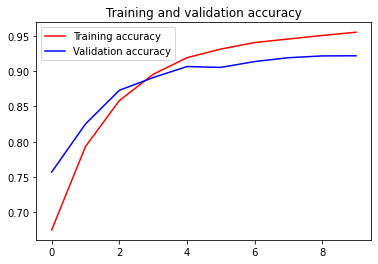

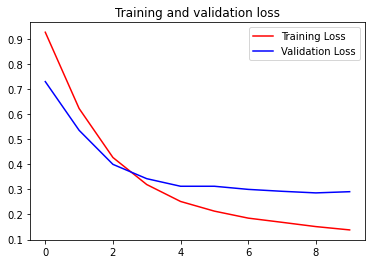

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
loss, acc = new_model.evaluate(X_test, Y_test, verbose=1)

700/700 [==============================] - 200s 284ms/step - loss: 0.2906 - accuracy: 0.9217


In [ ]:
y_LSTM=new_model.predict_classes(X_test)


E:\Anaconda\envs\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(y_LSTM)

[3 6 3 ... 9 9 6]


In [ ]:
Y_test_re= np.argmax(Y_test, axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_re, y_LSTM, digits=5))

              precision    recall  f1-score   support

           0    0.82872   0.87731   0.85232       921
           1    0.88186   0.75071   0.81102       706
           2    0.00000   0.00000   0.00000        12
           3    0.89636   0.93378   0.91469      4168
           4    0.00000   0.00000   0.00000         1
           5    0.90116   0.75242   0.82010      1551
           6    0.95567   0.95826   0.95696     10326
           7    0.87500   0.14894   0.25455        47
           8    0.84424   0.84045   0.84234       445
           9    0.90682   0.94108   0.92363      4209

    accuracy                        0.92174     22386
   macro avg    0.70898   0.62029   0.63756     22386
weighted avg    0.92118   0.92174   0.92013     22386



E:\Anaconda\envs\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\envs\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\envs\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
class_weight

{0: 2.4646420824,
 1: 3.1983110486,
 2: 239.2,
 3: 0.5398907104,
 4: 1514.9333333333,
 5: 1.4215827338,
 6: 0.2145392749,
 7: 77.0305084746,
 8: 5.0330011074,
 9: 0.541047619}